<a href="https://colab.research.google.com/github/heleownae/DA_Insurance_PJT/blob/main/%EC%83%9D%EB%B3%B4_%EC%A7%80%EA%B8%89_O_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생명보험 지급금액이 존재하는 로우만 추려서 클러스터링 (3개 군집)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import koreanize_matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity


pd.set_option('display.max_columns', None)
# fin = pd.read_csv('final_enco_업권분류.csv')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 생명보험 지급금액 O인 데이터 파일 로드 //1375건

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코사인 군집파일/생보 코사인 지급 O.csv')

In [ ]:
display(df)
print(df.columns)

,Unnamed: 0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율,코사인군집
0,284,1032188,4733018,2,6,2,1,6,49,2,10,49.000000,1,0,1,0,270,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,2,7.0,2.0,3.0,0.29,0.43,1.0,100.0,2
1,323,1519986,9953393,1,4,2,1,2,160,2,27,160.000000,1,1,1,1,123,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,1.0,0.0,0.0,0.00,0.00,2.0,100.0,1
2,386,1023137,7940086,2,4,1,1,4,91,2,20,83.333333,1,0,0,0,349,3,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,2,1.0,0.0,0.0,0.00,0.00,3.0,100.0,2
3,435,1863244,9403484,1,4,1,1,1,400,2,10,395.000000,1,1,1,0,96,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,2,10.0,3.0,2.0,0.30,0.20,1.0,100.0,0
4,470,618652,1807124,2,4,2,1,1,140,2,20,140.000000,1,1,1,0,380,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,3.0,0.0,1.0,0.00,0.33,3.0,100.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,58096,112936,8619730,2,5,2,1,1,90,2,20,82.666667,1,1,1,1,320,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,8.0,0.0,2.0,0.00,0.25,3.0,100.0,2
1371,58181,883760,618014,2,4,1,1,1,83,2,20,83.000000,1,1,1,0,170,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,12.0,3.0,1.0,0.25,0.08,4.0,100.0,1
1372,58200,660869,881350,2,6,2,1,1,84,2,10,102.000000,1,1,1,0,10600,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,10.0,0.0,1.0,0.00,0.10,2.0,100.0,2
1373,58204,1397810,5343191,2,6,3,1,1,81,2,10,81.000000,1,0,1,0,1428,7,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,5.0,2.0,0.0,0.40,0.00,8.0,100.0,2


Index(['Unnamed: 0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3',
       '연령대_4', '연령대_5', '연령대_6', '연령대_7', '연령대_8', '보험종류_1', '보험종류_2',
       '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9',
       '보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4',
       '채널_5', '채널_6', '채널_7', '채널_99', '납입주기_1', '납입주기_2', '납입주기_3',
       '납입주기_99', '성별_1', '성별_2', '업권', '보험계약건수', '해지건수', '만기건수', '해지율', '만기율',
       '청구건수', '계약유지율', '코사인군집'],
      dtype='object')


In [ ]:
# 분석에 사용한 컬럼
# #'GENDER','AGE_GROUP','reduce_GBN_CD','CT_PY_CYCLE_CD','CT_PY_PD','mean_AMT','CT_CHNL_CD','GBN_CD_1','GBN_CD_2',	'GBN_CD_3','GBN_CD_4',
#                            '보험계약건수', '해지율', '만기율', '청구건수', '계약유지율',
#                           '총지급금액','총지급 건수','기타','배책','사망/후유',	'수술/입원','실손',	'자동차'	,'진단/통원'	,'화재/재물'

#생보 군집 살펴보기
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

In [ ]:
df['코사인군집'].value_counts()

코사인군집
2    717
1    426
0    232
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1375 non-null   int64  
 1   JOIN_SN         1375 non-null   int64  
 2   POL_SN          1375 non-null   int64  
 3   GENDER          1375 non-null   int64  
 4   AGE_GROUP       1375 non-null   int64  
 5   reduce_GBN_CD   1375 non-null   int64  
 6   reduce_STAT_CD  1375 non-null   int64  
 7   CT_CHNL_CD      1375 non-null   int64  
 8   CT_PY_AMT       1375 non-null   int64  
 9   CT_PY_CYCLE_CD  1375 non-null   int64  
 10  CT_PY_PD        1375 non-null   int64  
 11  mean_AMT        1375 non-null   float64
 12  GBN_CD_1        1375 non-null   int64  
 13  GBN_CD_2        1375 non-null   int64  
 14  GBN_CD_3        1375 non-null   int64  
 15  GBN_CD_4        1375 non-null   int64  
 16  총지급금액           1375 non-null   int64  
 17  총지급 건수          1375 non-null   i

In [ ]:
# 불필요 컬럼 드랍
drop = [ '연령대_0', '연령대_1', '연령대_2', '연령대_3',
       '연령대_4', '연령대_5', '연령대_6', '연령대_7', '연령대_8', '보험종류_1', '보험종류_2',
       '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9',
       '보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4',
       '채널_5', '채널_6', '채널_7', '채널_99', '납입주기_1', '납입주기_2', '납입주기_3',
       '납입주기_99', '성별_1', '성별_2', '업권']
df.drop(columns=drop, inplace = True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물', '보험계약건수', '해지건수', '만기건수', '해지율', '만기율',
       '청구건수', '계약유지율', '코사인군집'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1375 non-null   int64  
 1   JOIN_SN         1375 non-null   int64  
 2   POL_SN          1375 non-null   int64  
 3   GENDER          1375 non-null   int64  
 4   AGE_GROUP       1375 non-null   int64  
 5   reduce_GBN_CD   1375 non-null   int64  
 6   reduce_STAT_CD  1375 non-null   int64  
 7   CT_CHNL_CD      1375 non-null   int64  
 8   CT_PY_AMT       1375 non-null   int64  
 9   CT_PY_CYCLE_CD  1375 non-null   int64  
 10  CT_PY_PD        1375 non-null   int64  
 11  mean_AMT        1375 non-null   float64
 12  GBN_CD_1        1375 non-null   int64  
 13  GBN_CD_2        1375 non-null   int64  
 14  GBN_CD_3        1375 non-null   int64  
 15  GBN_CD_4        1375 non-null   int64  
 16  총지급금액           1375 non-null   int64  
 17  총지급 건수          1375 non-null   i

In [ ]:
df = df.astype({'JOIN_SN':'str', 'POL_SN':'str','GENDER':'str', 'AGE_GROUP':'str','reduce_GBN_CD':'str', 'reduce_STAT_CD':'str','CT_CHNL_CD':'str', 'CT_PY_CYCLE_CD':'str',  '코사인군집':'str'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1375 non-null   int64  
 1   JOIN_SN         1375 non-null   object 
 2   POL_SN          1375 non-null   object 
 3   GENDER          1375 non-null   object 
 4   AGE_GROUP       1375 non-null   object 
 5   reduce_GBN_CD   1375 non-null   object 
 6   reduce_STAT_CD  1375 non-null   object 
 7   CT_CHNL_CD      1375 non-null   object 
 8   CT_PY_AMT       1375 non-null   int64  
 9   CT_PY_CYCLE_CD  1375 non-null   object 
 10  CT_PY_PD        1375 non-null   int64  
 11  mean_AMT        1375 non-null   float64
 12  GBN_CD_1        1375 non-null   int64  
 13  GBN_CD_2        1375 non-null   int64  
 14  GBN_CD_3        1375 non-null   int64  
 15  GBN_CD_4        1375 non-null   int64  
 16  총지급금액           1375 non-null   int64  
 17  총지급 건수          1375 non-null   i

In [ ]:
grouped = df.groupby('코사인군집')

In [ ]:
grouped.describe(include='object')

JOIN_SN                      POL_SN                      GENDER         \
        count unique      top freq  count unique      top freq  count unique   
코사인군집                                                                          
0         232    227  1160162    2    232    232  9403484    1    232      2   
1         426    416  1160162    2    426    426  9953393    1    426      2   
2         717    671   660078    4    717    717  4733018    1    717      2   

               AGE_GROUP                 reduce_GBN_CD                  \
      top freq     count unique top freq         count unique top freq   
코사인군집                                                                    
0       2  133       232      8   3   66           232      6   2  115   
1       2  215       426      9   3  104           426      6   2  212   
2       2  384       717      9   5  156           717      6   2  326   

      reduce_STAT_CD                 CT_CHNL_CD                  \
               count unique top freq      count unique top freq   
코사인군집                                                             
0                232      3   1  210        232      6   1  195   
1                426      4   1  395        426      7   1  331   
2                717      4   1  592        717      6   1  426   

      CT_PY_CYCLE_CD                  
               count unique top freq  
코사인군집                                 
0                232      3   2  225  
1                426      3   2  422  
2                717      3   2  705

In [ ]:
grouped.describe()

Unnamed: 0                                                        \
           count          mean           std    min       25%      50%   
코사인군집                                                                    
0          232.0  29016.681034  17784.750677  435.0  12970.50  27644.5   
1          426.0  29610.596244  16584.269094  323.0  15149.75  30413.0   
2          717.0  29234.486750  17214.356473  284.0  14693.00  29311.0   

                        CT_PY_AMT                                              \
           75%      max     count        mean         std   min    25%    50%   
코사인군집                                                                           
0      44815.0  58211.0     232.0  238.021552  625.345871  16.0  71.75  120.0   
1      43925.5  58181.0     426.0  119.197183  113.160058   7.0  64.00   97.0   
2      43797.0  58204.0     717.0   99.596932  177.102969   7.0  41.00   76.0   

                     CT_PY_PD                                              \
         75%     max    count       mean       std  min   25%   50%   75%   
코사인군집                                                                       
0      192.5  5000.0    232.0  19.461207  8.413978  1.0  20.0  20.0  20.0   
1      150.0  1200.0    426.0  19.274648  6.844984  0.0  18.0  20.0  20.0   
2      120.0  4400.0    717.0  17.023710  8.818039  0.0  10.0  20.0  20.0   

            mean_AMT                                                          \
        max    count        mean         std   min    25%         50%    75%   
코사인군집                                                                          
0      99.0    232.0  195.455675  366.438709  14.0  69.15  115.000000  195.0   
1      52.0    426.0  115.264032  104.508687   7.0  62.00   93.750000  145.0   
2      99.0    717.0   97.892817  176.778549   7.0  40.00   73.333333  120.0   

                   GBN_CD_1                                               \
               max    count      mean       std  min  25%  50%  75%  max   
코사인군집                                                                      
0      3000.000000    232.0  0.935345  0.246448  0.0  1.0  1.0  1.0  1.0   
1      1233.333333    426.0  0.899061  0.301602  0.0  1.0  1.0  1.0  1.0   
2      4400.000000    717.0  0.754533  0.430664  0.0  1.0  1.0  1.0  1.0   

      GBN_CD_2                                              GBN_CD_3  \
         count      mean       std  min  25%  50%  75%  max    count   
코사인군집                                                                  
0        232.0  0.853448  0.354423  0.0  1.0  1.0  1.0  1.0    232.0   
1        426.0  0.859155  0.348271  0.0  1.0  1.0  1.0  1.0    426.0   
2        717.0  0.704324  0.456665  0.0  0.0  1.0  1.0  1.0    717.0   

                                                   GBN_CD_4            \
           mean       std  min  25%  50%  75%  max    count      mean   
코사인군집                                                                   
0      0.853448  0.354423  0.0  1.0  1.0  1.0  1.0    232.0  0.413793   
1      0.852113  0.355406  0.0  1.0  1.0  1.0  1.0    426.0  0.408451   
2      0.716876  0.450831  0.0  0.0  1.0  1.0  1.0    717.0  0.384937   

                                          총지급금액                            \
            std  min  25%  50%  75%  max  count         mean          std   
코사인군집                                                                       
0      0.493577  0.0  0.0  0.0  1.0  1.0  232.0    70.000000   106.806091   
1      0.492125  0.0  0.0  0.0  1.0  1.0  426.0   188.791080   124.326178   
2      0.486920  0.0  0.0  0.0  1.0  1.0  717.0  2237.451883  4173.948938   

                                             총지급 건수                           \
        min     25%    50%      75%      max  count      mean       std  min   
코사인군집                                                                          
0      10.0   31.75   52.0    78.25   1100.0  232.0  1.288793  0.676286  1.0   
1      44.0  120.0

### gender
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

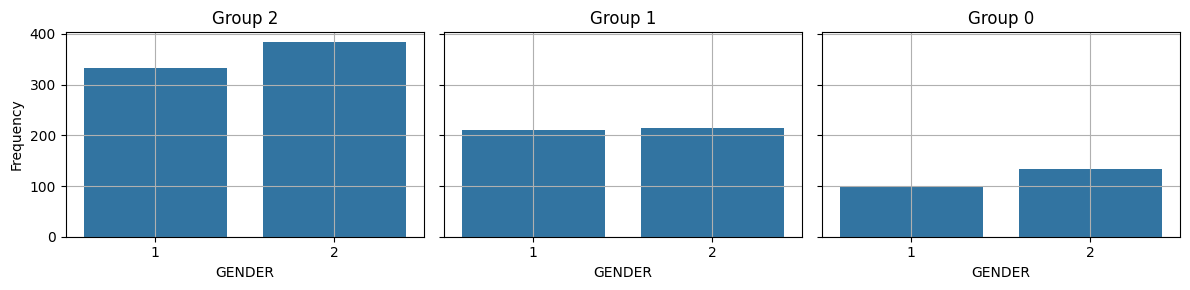

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 're_group' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # countplot 그리기
    sns.countplot(x='GENDER', data=subset, ax=ax)
    ax.set_title(f'Group {group}')
    ax.set_xlabel('GENDER')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()

### age_group
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

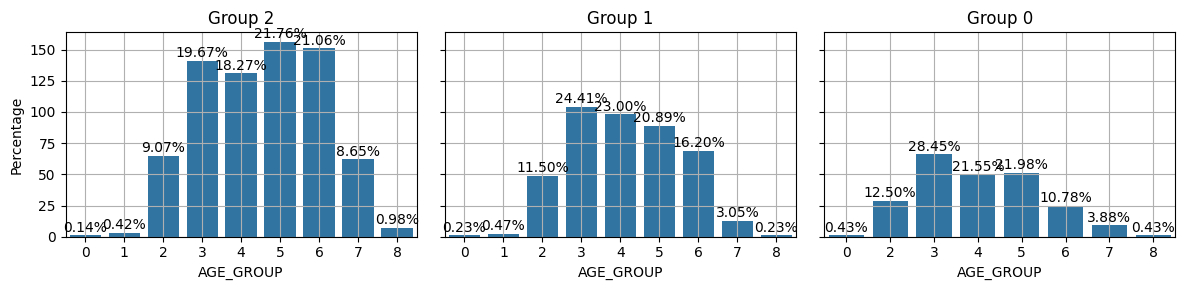

In [ ]:
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='AGE_GROUP', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('AGE_GROUP')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()



### reduce_GBN
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

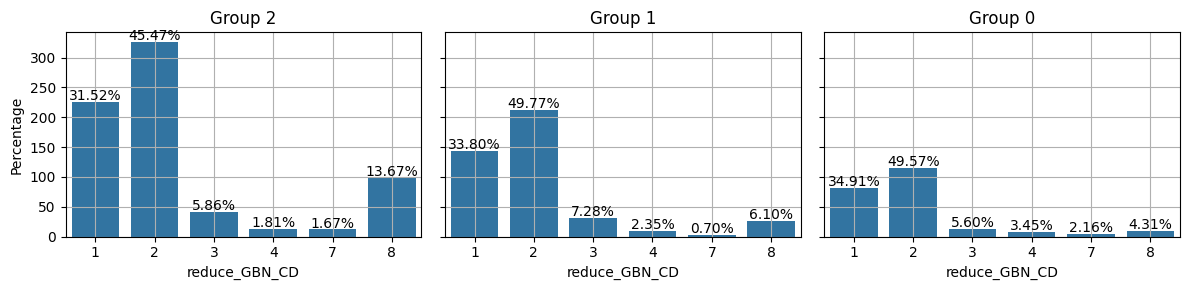

In [ ]:
# # '코사인군집'의 유니크한 값을 찾기
# unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# # 서브플롯 준비
# fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# # 각 유니크한 're_group' 값에 대해 서브플롯 생성
# for ax, group in zip(axes, unique_group):
#     # 현재 cycle 값에 해당하는 데이터 필터링
#     subset = df[df['코사인군집'] == group]

#     # countplot 그리기
#     sns.countplot(x='reduce_GBN_CD', data=subset, ax=ax)
#     ax.set_title(f'Group {group}')
#     ax.set_xlabel('reduce_GBN_CD')
#     ax.set_ylabel('Frequency')
#     ax.grid(True)

# plt.tight_layout()
# plt.show()


# import seaborn as sns
# import matplotlib.pyplot as plt

# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='reduce_GBN_CD', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('reduce_GBN_CD')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
- 보험종류코드: 차원 축소
 1   - 사망류: 종신(01), 정기(02)
 2  - 질병류: 질병(03), 암(05)
 3 - 상해보험(04) 단독
 4- 어린이보험(07), 실비보험(16)
 5- 운전자(13) 단독
 6 - 여행자(14) 단독
 7 - 연금저축(09), 연금(10), 저축(11)
 8 - 기타: 간병(06), 치아(08), 교육(12), 골프(15), 기타보험(99)
 9- 화재(18)
    - 값 없음(0건): 자동차(17), 배상책임(19). 무시.


### CT_PY_PD
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

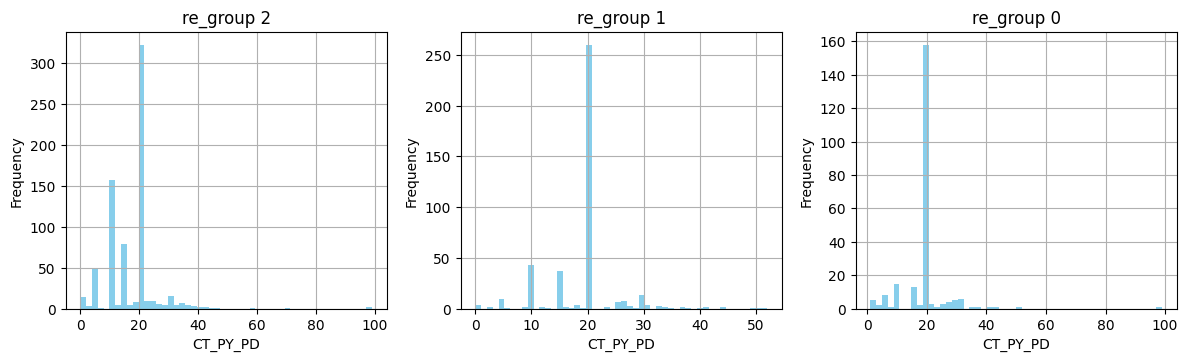

In [ ]:
# 'CT_PY_CYCLE_CD'의 유니크한 값을 찾기
unique_cycles = df['코사인군집'].unique()

# subplots와 subplot은 다른 것!!!


#전체 크기를 조절하는 코드
#있어도 되고 없어도된다.
plt.figure(figsize=(12, 10))


# 각 유니크한 'CT_PY_CYCLE_CD' 값에 대해 서브플롯 생성
for i, cycle in enumerate(unique_cycles):#enumerate를 통해 인덱스 값과 값을 받아온다.
    plt.subplot(3,len(unique_cycles),i+1)
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == cycle]
    # 히스토그램 그리기
    plt.hist(subset['CT_PY_PD'], bins=50, color='skyblue')
    plt.title(f're_group {cycle}')
    plt.xlabel('CT_PY_PD')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

### mean_AMT
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

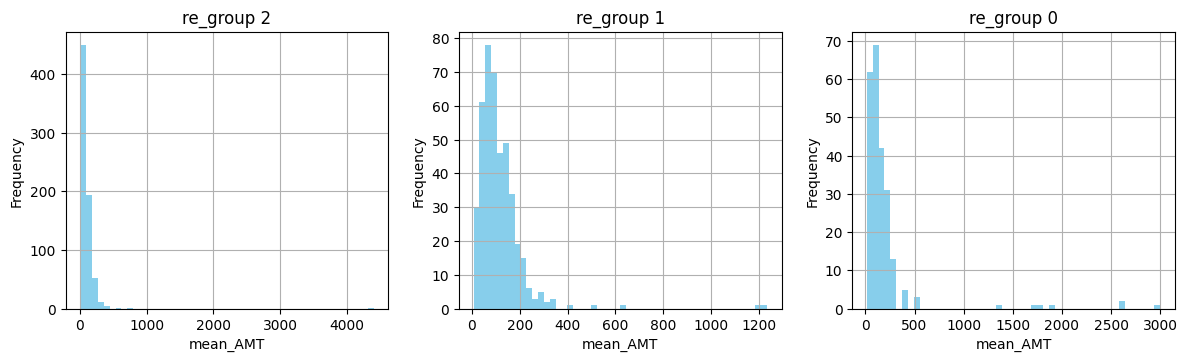

In [ ]:
# 'CT_PY_CYCLE_CD'의 유니크한 값을 찾기
unique_cycles = df['코사인군집'].unique()
# subplots와 subplot은 다른 것!!!


#전체 크기를 조절하는 코드
#있어도 되고 없어도된다.
plt.figure(figsize=(12, 10))


# 각 유니크한 'CT_PY_CYCLE_CD' 값에 대해 서브플롯 생성
for i, cycle in enumerate(unique_cycles):#enumerate를 통해 인덱스 값과 값을 받아온다.
    plt.subplot(3,len(unique_cycles),i+1)
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == cycle]
    # 히스토그램 그리기
    plt.hist(subset['mean_AMT'], bins=50, color='skyblue')
    plt.title(f're_group {cycle}')
    plt.xlabel('mean_AMT')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

### 총지급금액
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-53-8a1927abddf5>:23: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  plt.tight_layout()
<ipython-input-53-8a1927abddf5>:23: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-53-8a1927abddf5>:23: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  plt.tight_layout()
<ipython-input-53-8a1927abddf5>:23: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  plt.tight_layout()
<ipython-input-53-8a1927abddf5>:23: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing 

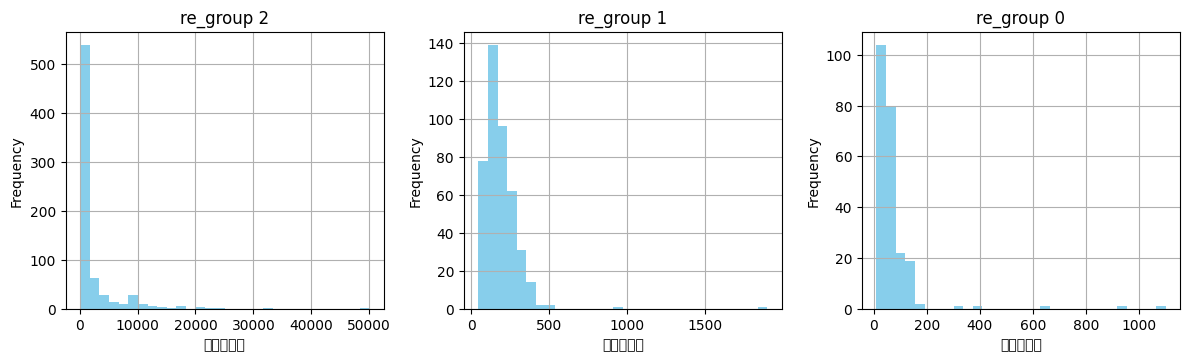

In [ ]:
# 'CT_PY_CYCLE_CD'의 유니크한 값을 찾기
unique_cycles = df['코사인군집'].unique()
# subplots와 subplot은 다른 것!!!


#전체 크기를 조절하는 코드
#있어도 되고 없어도된다.
plt.figure(figsize=(12, 10))


# 각 유니크한 'CT_PY_CYCLE_CD' 값에 대해 서브플롯 생성
for i, cycle in enumerate(unique_cycles):#enumerate를 통해 인덱스 값과 값을 받아온다.
    plt.subplot(3,len(unique_cycles),i+1)
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == cycle]
    # 히스토그램 그리기
    plt.hist(subset['총지급금액'], bins=30, color='skyblue')
    plt.title(f're_group {cycle}')
    plt.xlabel('총지급금액')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

### 총지급건수
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-67-2824a0e806ff>:23: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  plt.tight_layout()
<ipython-input-67-2824a0e806ff>:23: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-67-2824a0e806ff>:23: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from current font.
  plt.tight_layout()
<ipython-input-67-2824a0e806ff>:23: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
<ipython-input-67-2824a0e806ff>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing f

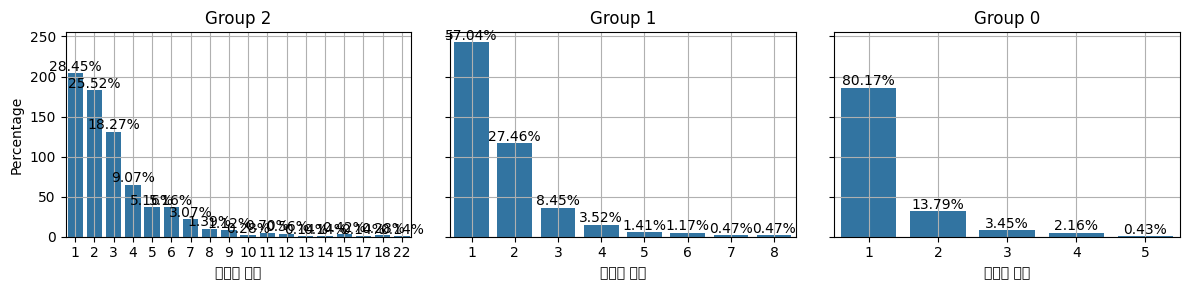

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='총지급 건수', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('총지급 건수')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


### 보험계약건수

컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-68-0a47b4eba5d2>:23: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  plt.tight_layout()
<ipython-input-68-0a47b4eba5d2>:23: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from current font.
  plt.tight_layout()
<ipython-input-68-0a47b4eba5d2>:23: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  plt.tight_layout()
<ipython-input-68-0a47b4eba5d2>:23: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  plt.tight_layout()
<ipython-input-68-0a47b4eba5d2>:23: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
<ipython-input-68-0a47b4eba5d2>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

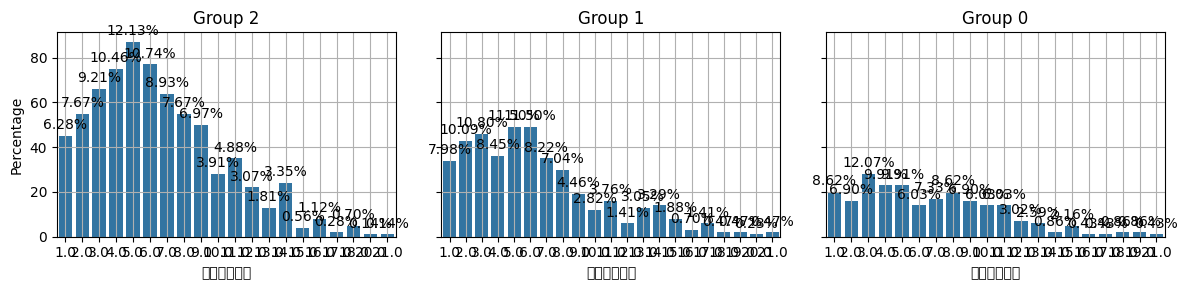

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='보험계약건수', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('보험계약건수')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


### 해지
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

### 만기
컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

### 청구건수

컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-69-7f02578ac7f7>:23: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-69-7f02578ac7f7>:23: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  plt.tight_layout()
<ipython-input-69-7f02578ac7f7>:23: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
<ipython-input-69-7f02578ac7f7>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: Us

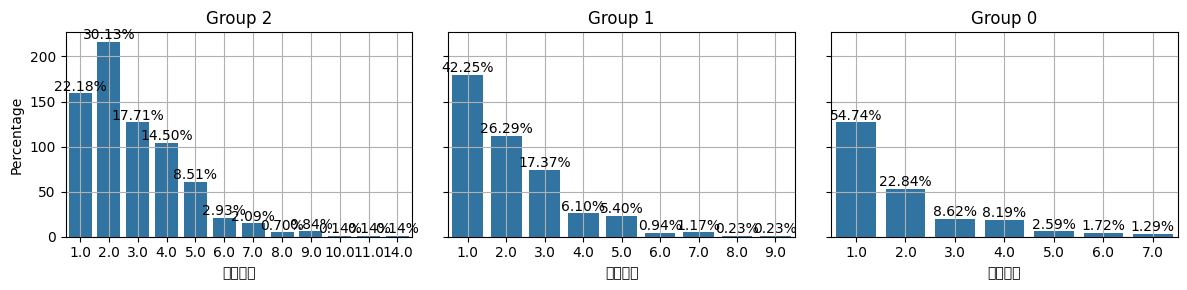

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='청구건수', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('청구건수')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()

### 계약 유지율

컬럼  : 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'CT_PY_PD', 'mean_AMT', '총지급금액', '총지급 건수', '보험계약건수','해지율', '만기율', '청구건수', '계약유지율'

<ipython-input-60-154826fda875>:21: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  plt.tight_layout()
<ipython-input-60-154826fda875>:21: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  plt.tight_layout()
<ipython-input-60-154826fda875>:21: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  plt.tight_layout()
<ipython-input-60-154826fda875>:21: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-60-154826fda875>:21: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from

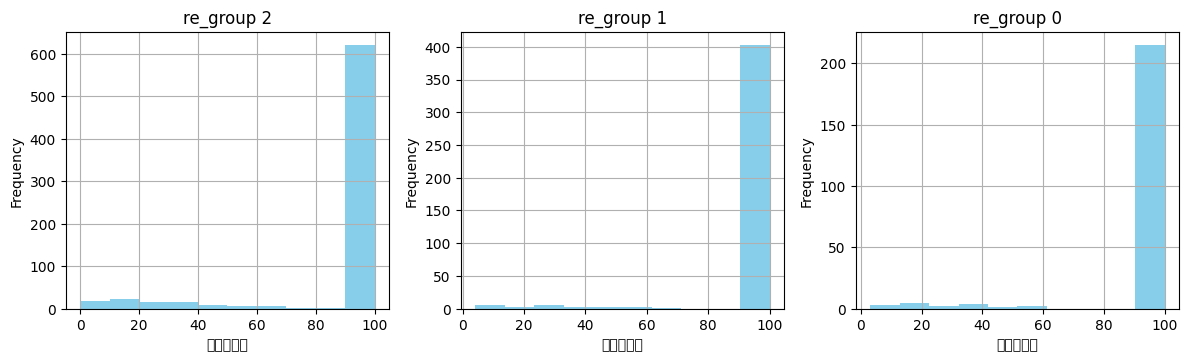

In [ ]:
# subplots와 subplot은 다른 것!!!


#전체 크기를 조절하는 코드
#있어도 되고 없어도된다.
plt.figure(figsize=(12, 10))


# 각 유니크한 'CT_PY_CYCLE_CD' 값에 대해 서브플롯 생성
for i, cycle in enumerate(unique_cycles):#enumerate를 통해 인덱스 값과 값을 받아온다.
    plt.subplot(3,len(unique_cycles),i+1)
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == cycle]
    # 히스토그램 그리기
    plt.hist(subset['계약유지율'], bins=10, color='skyblue')
    plt.title(f're_group {cycle}')
    plt.xlabel('계약유지율')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

수술/입원

<ipython-input-63-543e192559e5>:23: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-63-543e192559e5>:23: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from current font.
  plt.tight_layout()
<ipython-input-63-543e192559e5>:23: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  plt.tight_layout()
<ipython-input-63-543e192559e5>:23: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWa

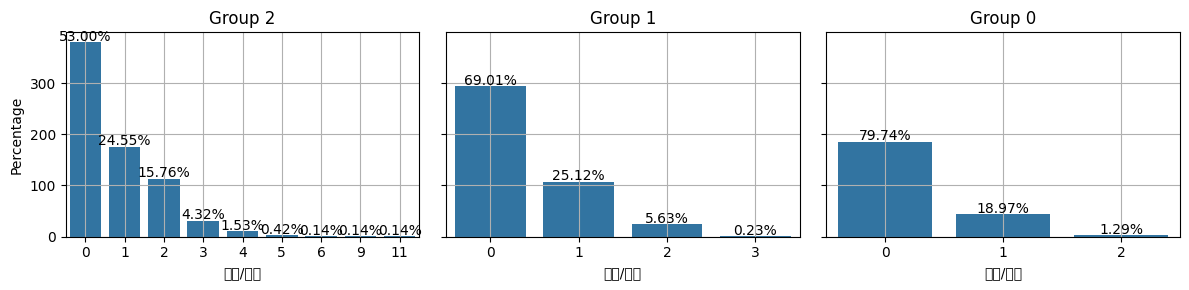

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='수술/입원', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('수술/입원')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-64-c439f4ff0b43>:24: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
<ipython-input-64-c439f4ff0b43>:24: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


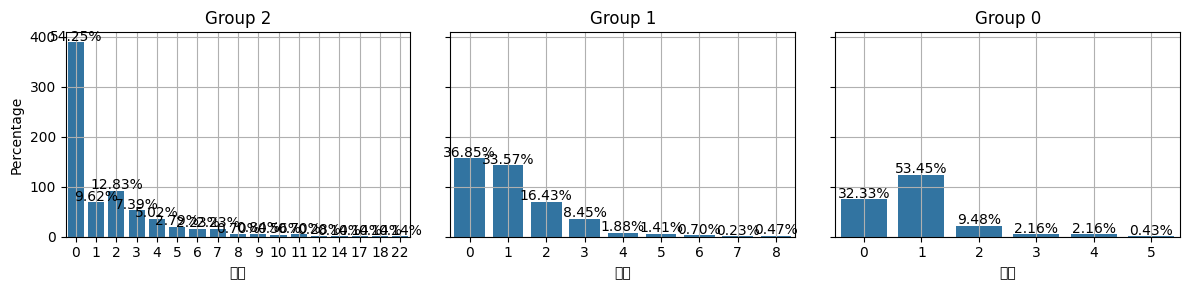

In [ ]:
#실손
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='실손', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('실손')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-70-7f9d613afdbb>:23: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  plt.tight_layout()
<ipython-input-70-7f9d613afdbb>:23: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
<ipython-input-70-7f9d613afdbb>:23: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  plt.tight_layout()
<ipython-input-70-7f9d613afdbb>:23: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: Us

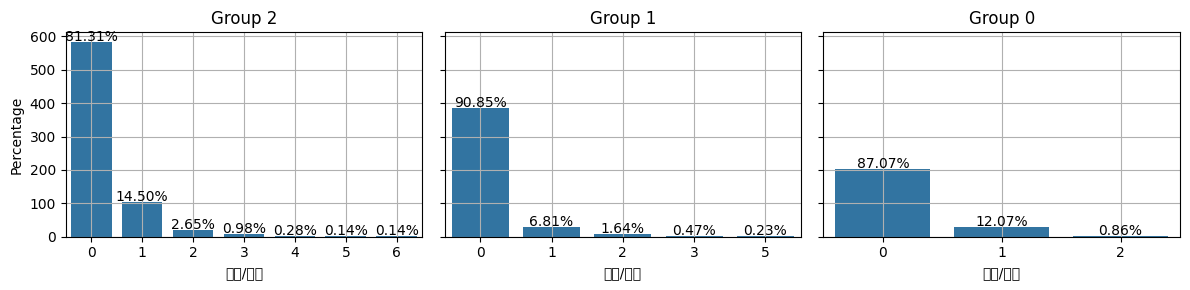

In [ ]:
# '코사인군집'의 유니크한 값을 찾기
unique_group = df['코사인군집'].dropna().unique()  # nan 값 제거

# 서브플롯 준비
fig, axes = plt.subplots(nrows=1, ncols=len(unique_group), figsize=(12, 3), sharey=True)

# 각 유니크한 '코사인군집' 값에 대해 서브플롯 생성
for ax, group in zip(axes, unique_group):
    # 현재 cycle 값에 해당하는 데이터 필터링
    subset = df[df['코사인군집'] == group]

    # 전체 데이터 대비 비율 계산
    total = float(len(subset))
    sns.countplot(x='진단/통원', data=subset, ax=ax)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format((height / total) * 100), ha="center")
    ax.set_title(f'Group {group}')
    ax.set_xlabel('진단/통원')
    ax.set_ylabel('Percentage')
    ax.grid(True)

plt.tight_layout()
plt.show()
